In [51]:
%reload_ext autoreload
%autoreload 2

In [52]:
from VirusHostNetworkAnalysis.prediction_matrix import PredictionMatrix
from VirusHostNetworkAnalysis.null_model import ER
from VirusHostNetworkAnalysis.null_model import CM
from VirusHostNetworkAnalysis.visualize import Graph
from VirusHostNetworkAnalysis.prediction_matrix import Calculations

In [9]:
import sys
myco = PredictionMatrix('Sample_Input/myco_predictions_genomad_a2vs.tsv')
myco.make_rectangular_matrix('prediction')
sys.getsizeof(myco.virus_host_array)


128

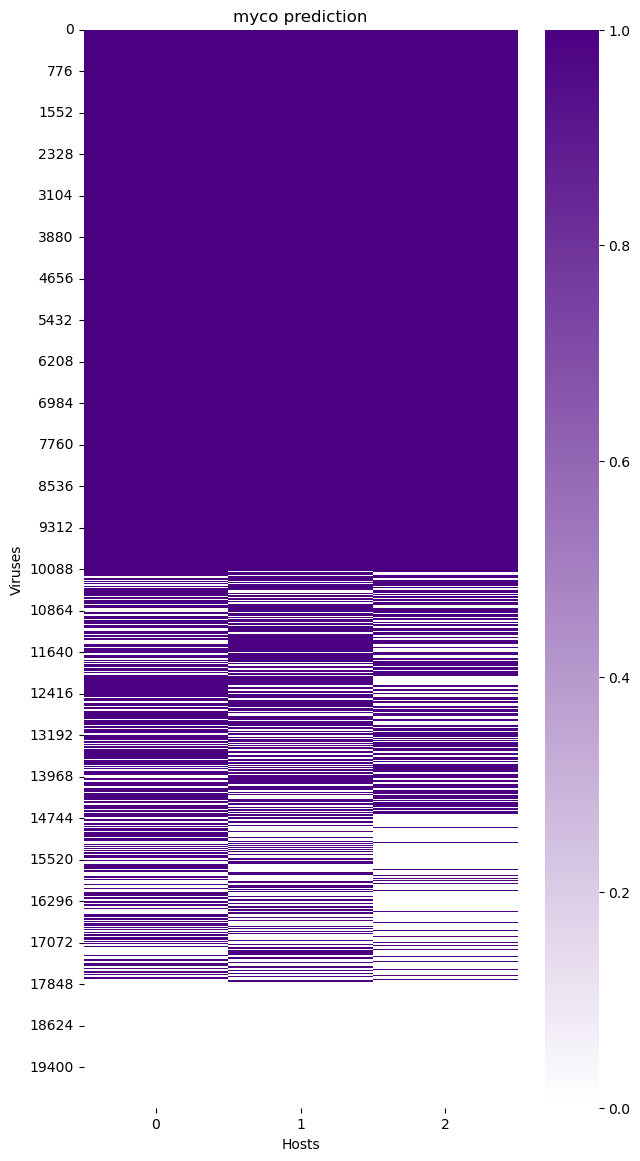

In [10]:
myco.plot_heatmap('prediction')

In [11]:
calc = Calculations(myco.virus_host_array)
calc.run_parallel(8)

Calculating nestedness:  11%|█         | 22840061/203182564 [13:50<1:49:20, 27489.51it/s]Process SpawnPoolWorker-262:
Process SpawnPoolWorker-264:
Process SpawnPoolWorker-263:
Process SpawnPoolWorker-258:
Process SpawnPoolWorker-260:
Process SpawnPoolWorker-259:
Process SpawnPoolWorker-257:
Process SpawnPoolWorker-261:

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.12/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/opt/anaconda3/lib/python3.12/multiprocessing/queues.py", line 386, in get
    with self._rlock:
  File "/

KeyboardInterrupt: 

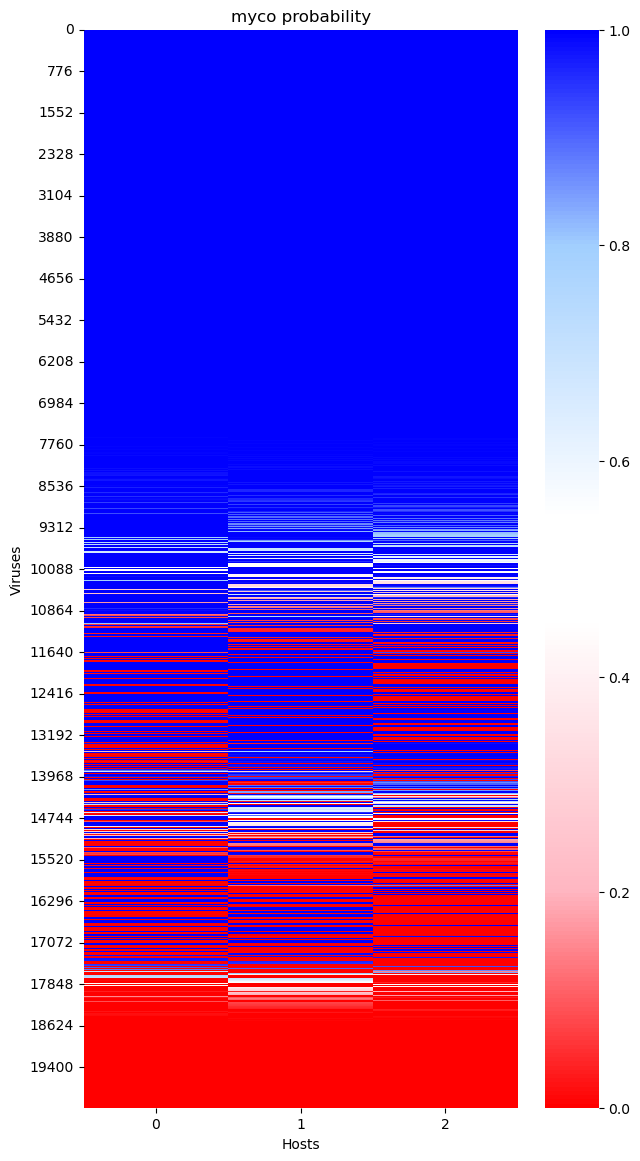

In [8]:
myco.make_rectangular_matrix('probability')
myco.plot_heatmap('probability')

In [12]:
sys.getsizeof(myco.virus_host_array)
myco.virus_host_array.shape

(20159, 3)

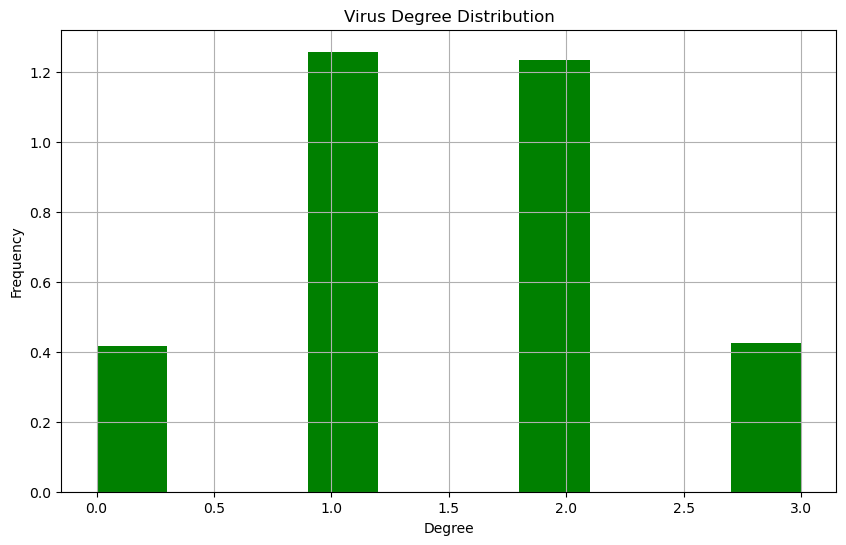

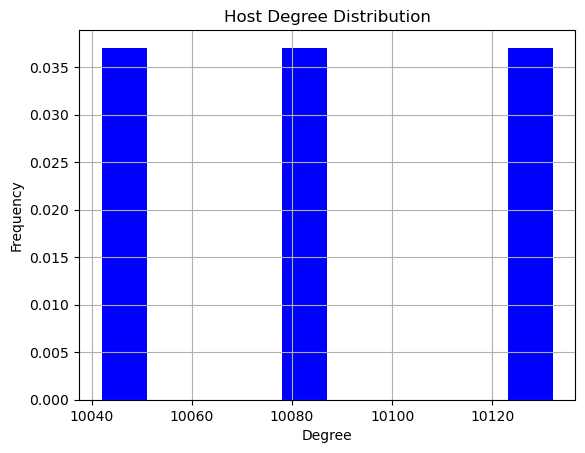

In [17]:
myco_er = ER(len(myco.unique_viruses), len(myco.unique_hosts), 0.5)
myco_er.fill_ER_graph()
myco_er.create_edge_list()

myco_er_graph = Graph(myco_er.matrix_rand, myco.unique_viruses, myco.unique_hosts)
myco_er_graph.degree_distribution(myco_er.calculate_degree())

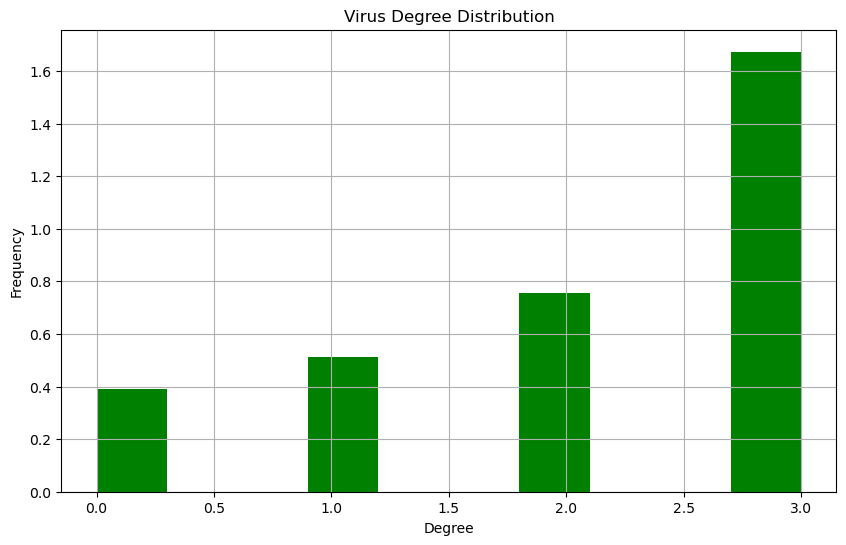

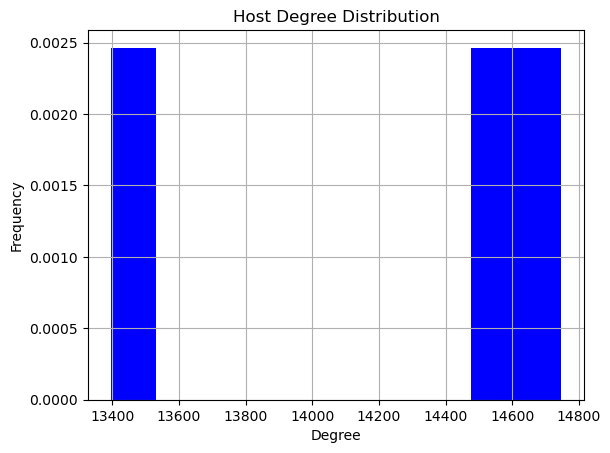

In [4]:
myco_cm = CM(myco.virus_host_array)
#myco_cm.bootstrap_stats(1000)

myco_cm_graph = Graph(myco_cm.matrix_vhip, myco.unique_viruses, myco.unique_hosts)
myco_cm_graph.degree_distribution(myco_cm.bootstrap_stats(1000))

### 100 by 2000 subset code is below

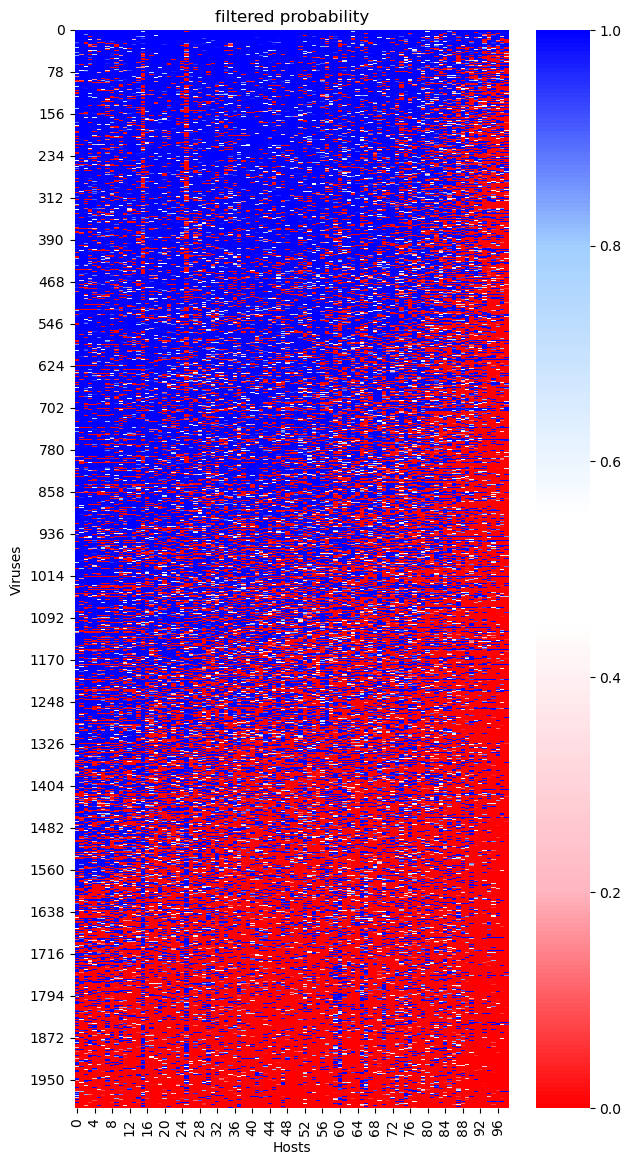

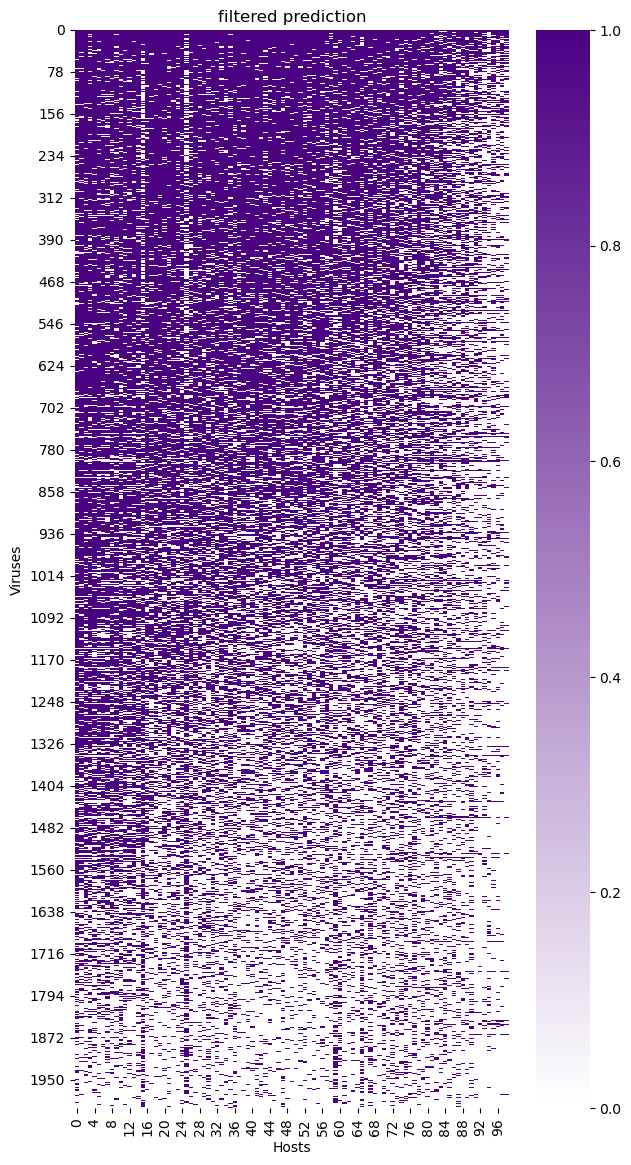

In [53]:
### Large subset 100 x 2000
filtered = PredictionMatrix('Sample_Input/filtered_network.tsv')
filtered.make_rectangular_matrix('probability')
filtered.plot_heatmap('probability')
filtered.make_rectangular_matrix('prediction')
filtered.plot_heatmap('prediction')

In [55]:
from VirusHostNetworkAnalysis.null_model import CM
filtered_cm = CM(filtered.virus_host_array)
deg_seq = filtered_cm.bootstrap_stats(1000)
# filtered_cm_graph = Graph(filtered_cm, filtered.unique_viruses, filtered.unique_hosts)
# filtered_cm_graph.degree_distribution(deg_seq)
# filtered_cm_graph.plot_heatmap()

Swapping edges: 1007it [00:00, 13536.60it/s]            ?, ?it/s]


Successful runs:  1000 Failed runs:  7


In [7]:
calc = Calculations(filtered_cm.matrix_vhip, True)
calc.run_parallel(8)

Calculating nestedness:  20%|█▉        | 399933/2007852 [00:38<02:32, 10539.77it/s]Process SpawnPoolWorker-253:
Process SpawnPoolWorker-256:
Process SpawnPoolWorker-252:
Process SpawnPoolWorker-251:
Process SpawnPoolWorker-255:
Process SpawnPoolWorker-254:
Process SpawnPoolWorker-249:
Calculating nestedness:  20%|█▉        | 400767/2007852 [00:38<02:33, 10492.25it/s]Traceback (most recent call last):
Process SpawnPoolWorker-250:
  File "/opt/anaconda3/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.12/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
                    ^^^^^^^^^^^^^^^^^^^
  File "/Users/emmalyncampau/Documents/Duhaime Lab/VirusHostNetworkAnalysis/VirusHostNetworkAnalysis/prediction_matrix.py", line 249, in nestedness_rows
    N_row = s

KeyboardInterrupt: 

eigen done


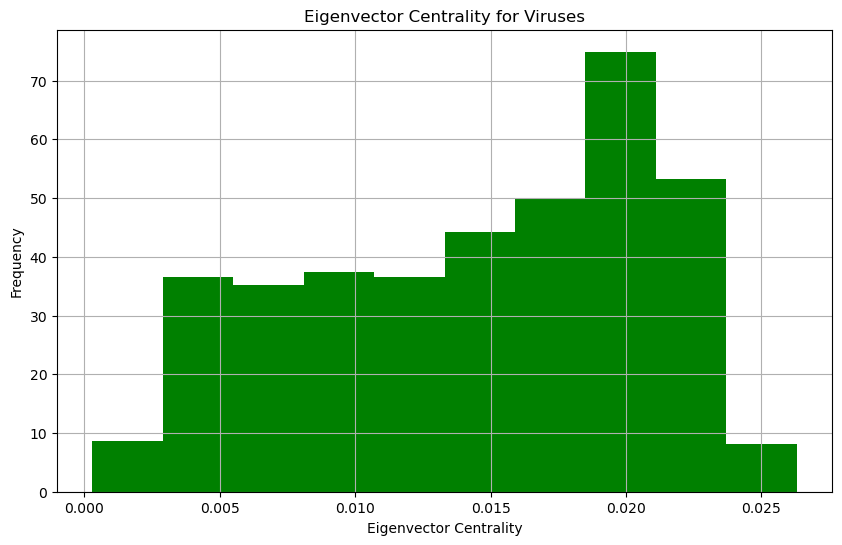

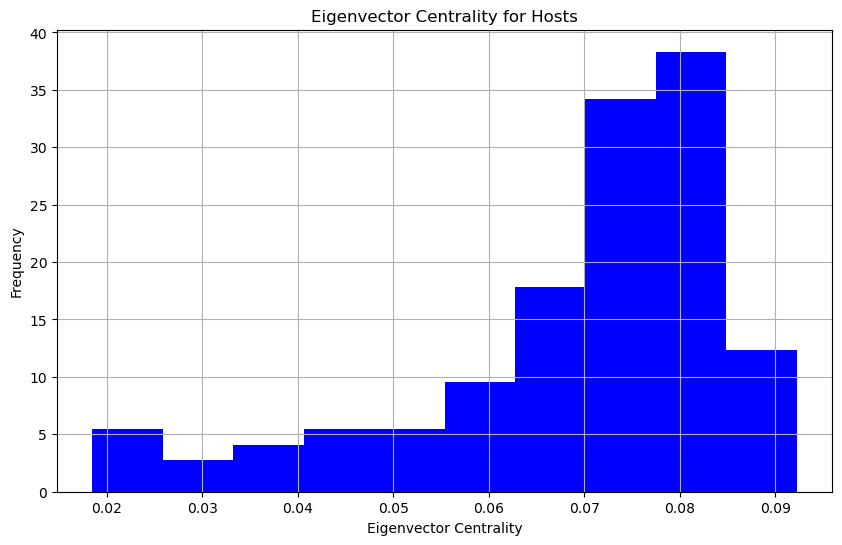

closeness done


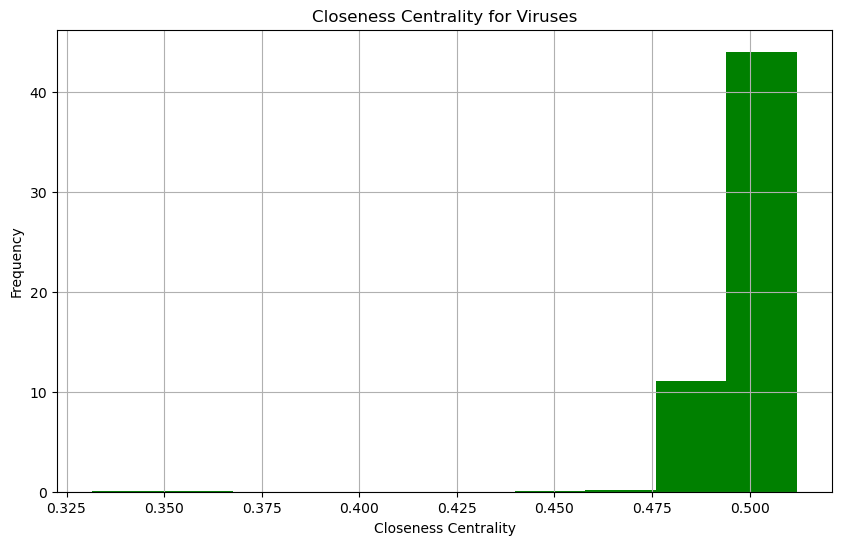

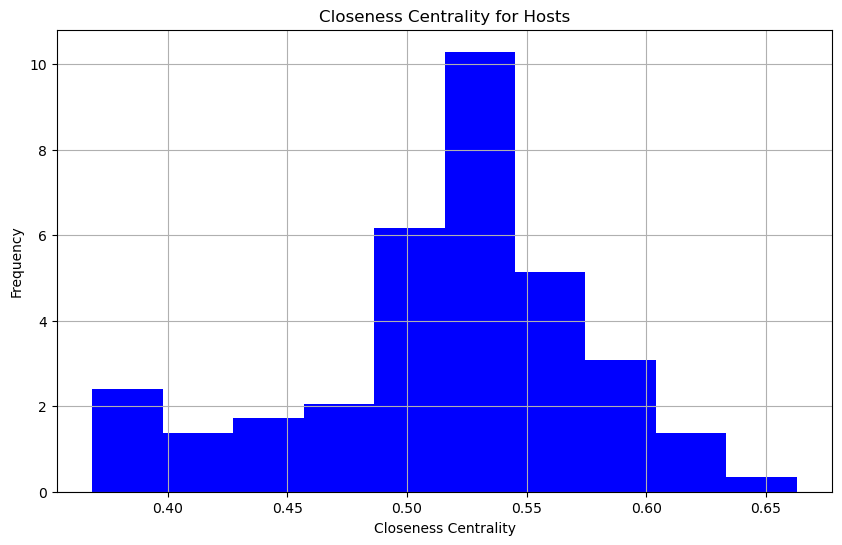

betweenness done


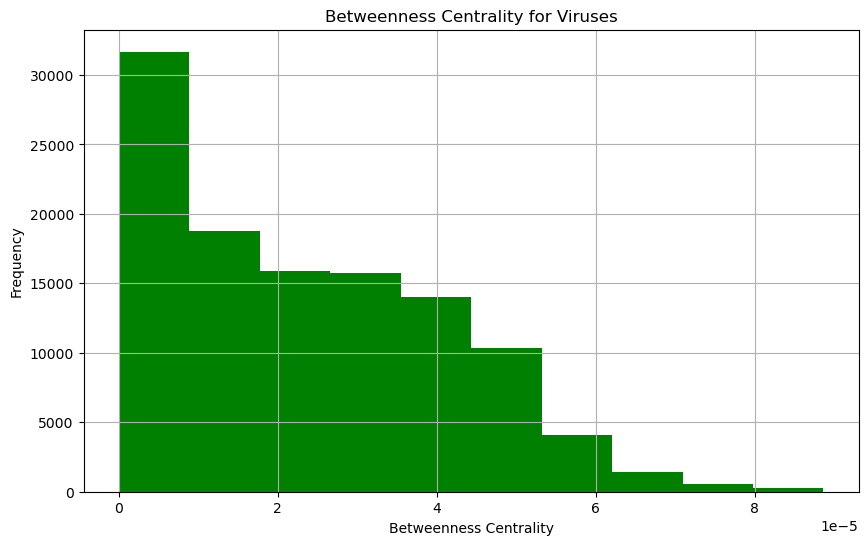

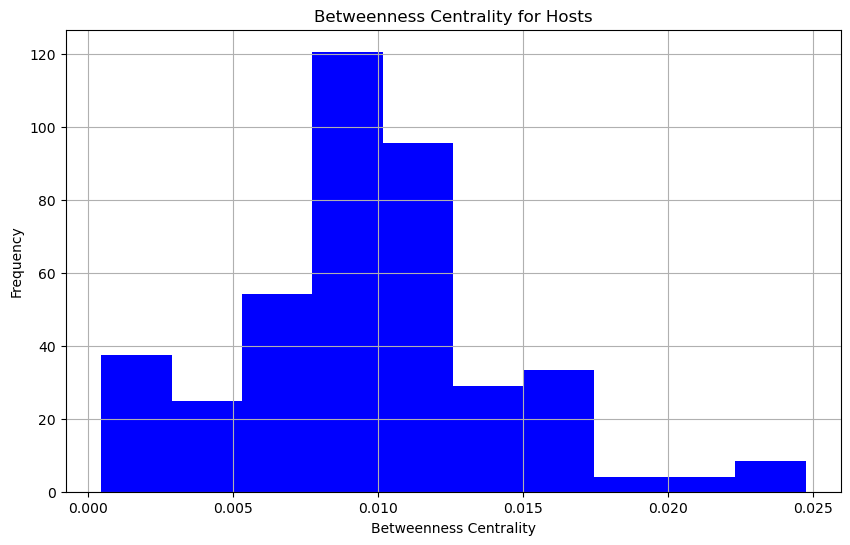

In [15]:
filtered_plot = Graph(filtered.virus_host_array, filtered.rows, filtered.columns)
filtered_plot.initialize_graph()
filtered_plot.calculate_centrality(2000, 'eigenvector')
filtered_plot.plot_eigenvectors()
filtered_plot.calculate_centrality(2000, 'closeness')
filtered_plot.plot_closeness()
filtered_plot.calculate_centrality(2000, 'betweenness')
filtered_plot.plot_betweenness()

In [7]:
filtered = PredictionMatrix('Sample_Input/filtered_network.tsv')
filtered.make_rectangular_matrix('prediction')

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True, False,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

In [4]:
cal = Calculations(filtered.virus_host_array, True)
nodf = cal.run_parallel(8)

Calculating nestedness: 100%|██████████| 2007852/2007852 [02:55<00:00, 11459.27it/s]

68.25598506256829 70.09512285448879


In [5]:
print(nodf)

69.17555395852854


Swapping edges: 100%|██████████| 1/1 [00:00<00:00, 3923.58it/s]


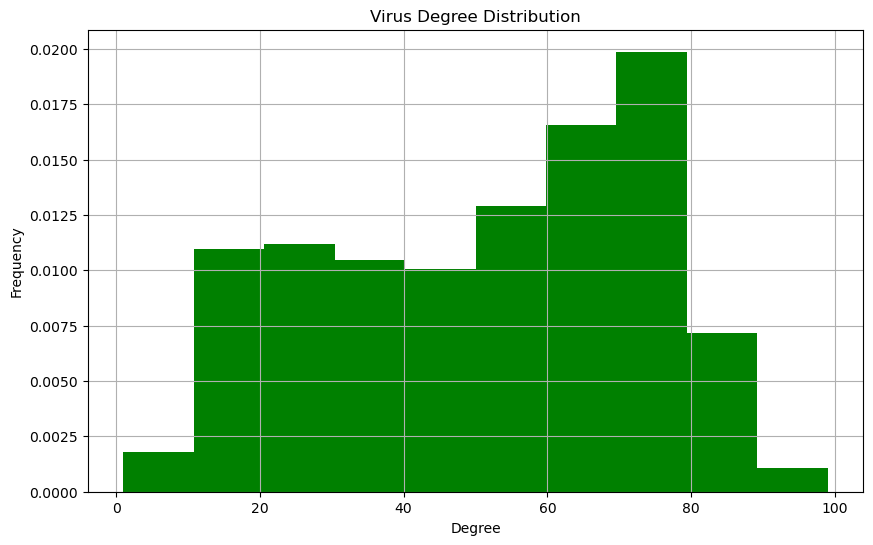

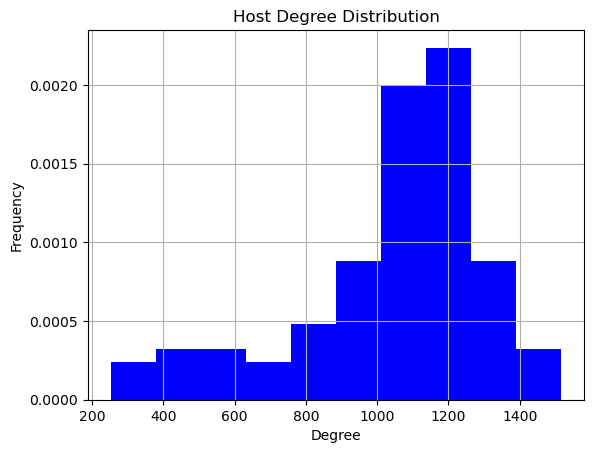

eigen done


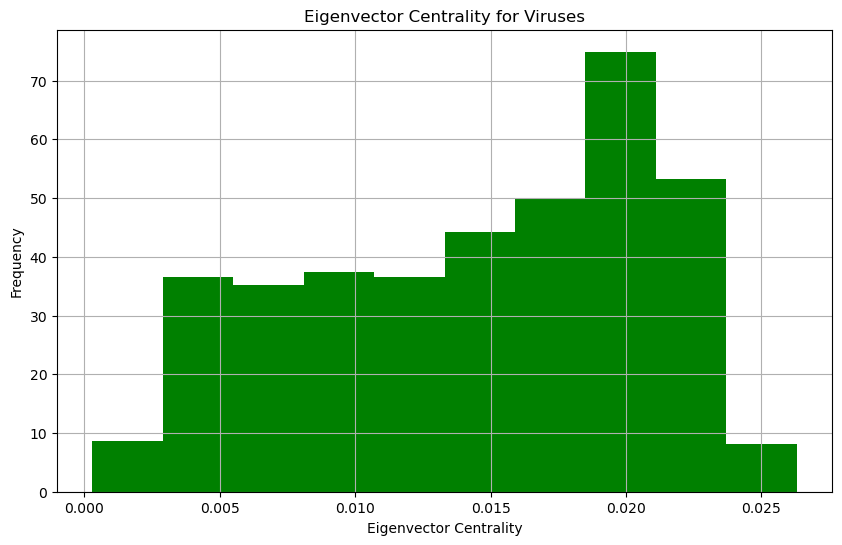

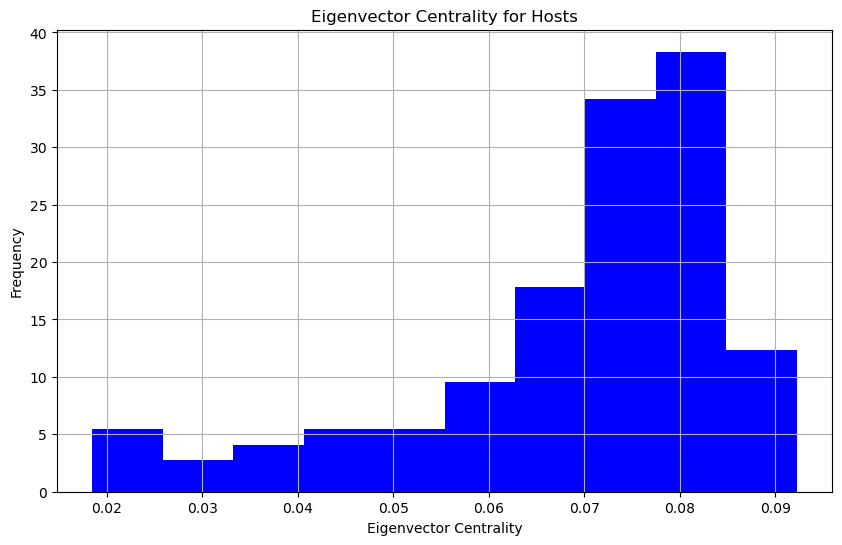

In [13]:
filtered_cm_1 = CM(filtered.virus_host_array)
filtered_graph = Graph(filtered_cm_1.matrix_vhip, filtered.unique_viruses, filtered.unique_hosts)
filtered_graph.degree_distribution(filtered_cm.bootstrap_stats(1))



In [4]:
aug4 = PredictionMatrix('Sample_Input/aug4_predictions.tsv')
aug4.make_rectangular_matrix('prediction')
cal_aug4 = Calculations(aug4.virus_host_array, True)
nodf_aug4 = cal_aug4.run_parallel(8)
print(nodf_aug4)

Calculating nestedness: 100%|██████████| 20528164/20528164 [19:51<00:00, 17230.42it/s]


58.4232427061614 63.64903476109759
61.0361387336295


In [ ]:
config_nested = Calculations(filtered_cm.matrix_vhip, True)
nodf = config_nested.run_parallel(8)
print(nodf)